In [4]:
import os, sys
import numpy as np
import json
from addict import Dict
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from astropy.visualization import MinMaxInterval, AsinhStretch, ImageNormalize
from baobab import bnn_priors
from baobab.configs import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Visualizing the images

__Author:__ Ji Won Park (@jiwoncpark)
    
__Created:__ 8/30/19
    
__Last run:__ 11/08/19

In this notebook, we'll visualize the images generated with `DiagonalBNNPrior` via the configuration in `tdlmc_diagonal_config.py`.

__Before running this notebook:__
1. Generate some data. At the root of the `baobab` repo, run:
```
generate baobab/configs/tdlmc_diagonal_cosmo_config.py --n_data 1000
```
This generates 1000 samples using `DiagonalCosmoBNNPrior` at the current working directory (the repo root). 

2. The `generate` script you just ran also exported a log file in the end, as a json file, to the current working directory. The name follows the format `"log_%m-%d-%Y_%H:%M_baobab.json"` where the date and time are of those at which you ran the script. Modify `baobab_log_path` in the below cell to the correct log path.

In [5]:
baobab_log_path = '/home/jwp/stage/sl/h0rton/log_12-10-2019_01:30_baobab.json'
with open(baobab_log_path, 'r') as f:
    log_str = f.read()
cfg = Dict(json.loads(log_str))
meta = pd.read_csv(os.path.abspath(os.path.join(cfg.out_dir, 'metadata.csv')), index_col=None)

In [7]:
img_files = [fname for fname in os.listdir(cfg.out_dir) if fname.endswith('.npy')]

In [ ]:
# TODO: description, asinh scale...

### View one image at a time in asinh scale with metadata

H0                                 74.151
agn_light_magnitude               20.2519
external_shear_dec_0          -1.0075e-07
external_shear_gamma_ext       0.00999681
external_shear_psi_ext            1.11572
external_shear_ra_0          -1.50331e-08
img_filename                X_0000001.npy
kappa_ext                      -0.0121304
lens_light_R_sersic              0.723393
lens_light_center_x          -1.50331e-08
lens_light_center_y           -1.0075e-07
lens_light_e1                   -0.122602
lens_light_e2                   0.0683673
lens_light_magnitude              18.1166
lens_light_n_sersic               3.78411
lens_mass_center_x           -1.50331e-08
lens_mass_center_y            -1.0075e-07
lens_mass_e1                    -0.109656
lens_mass_e2                    0.0231055
lens_mass_gamma                   2.02317
lens_mass_theta_E                 1.09559
n_img                                   3
src_light_R_sersic               0.397794
src_light_center_x              -0

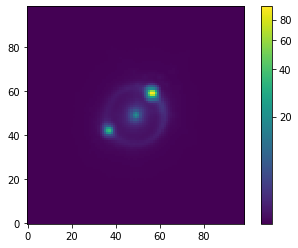

In [9]:
img_idx = 1

img_path = os.path.join(cfg.out_dir, img_files[img_idx])
img = np.load(img_path)

norm = ImageNormalize(img, interval=MinMaxInterval(), stretch=AsinhStretch())

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
im = ax.imshow(img, origin='lower', norm=norm)
fig.colorbar(im)

print(meta.iloc[img_idx])

### View many images at a time in linear scale

In [11]:
n_img = 100

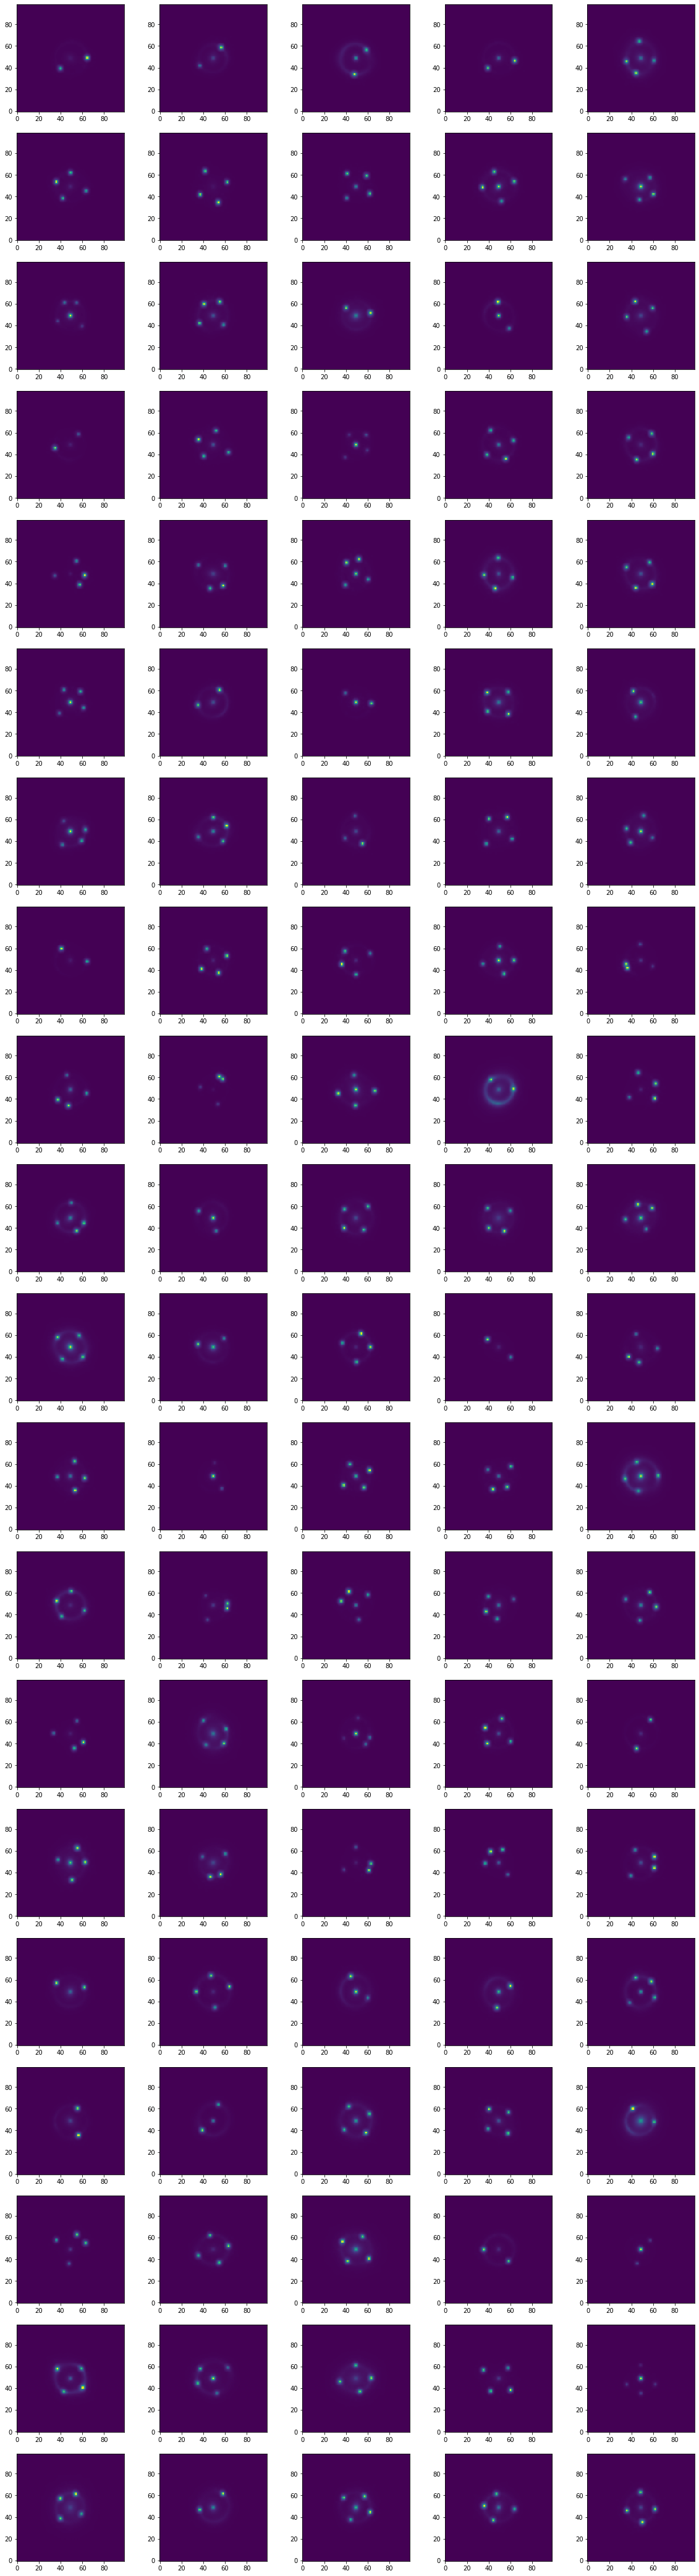

In [12]:
import glob
import matplotlib.image as mpimg

imgs = []
for img_file in img_files[:n_img]:
    img_path = os.path.join(cfg.out_dir, img_file)
    imgs.append(np.load(img_path))

plt.figure(figsize=(20, 80))
n_columns = 5
for i, img in enumerate(imgs):
    plt.subplot(len(imgs)/n_columns+1, n_columns, i+1)
    plt.imshow(img, origin='lower')

### View many images at a time in asinh scale

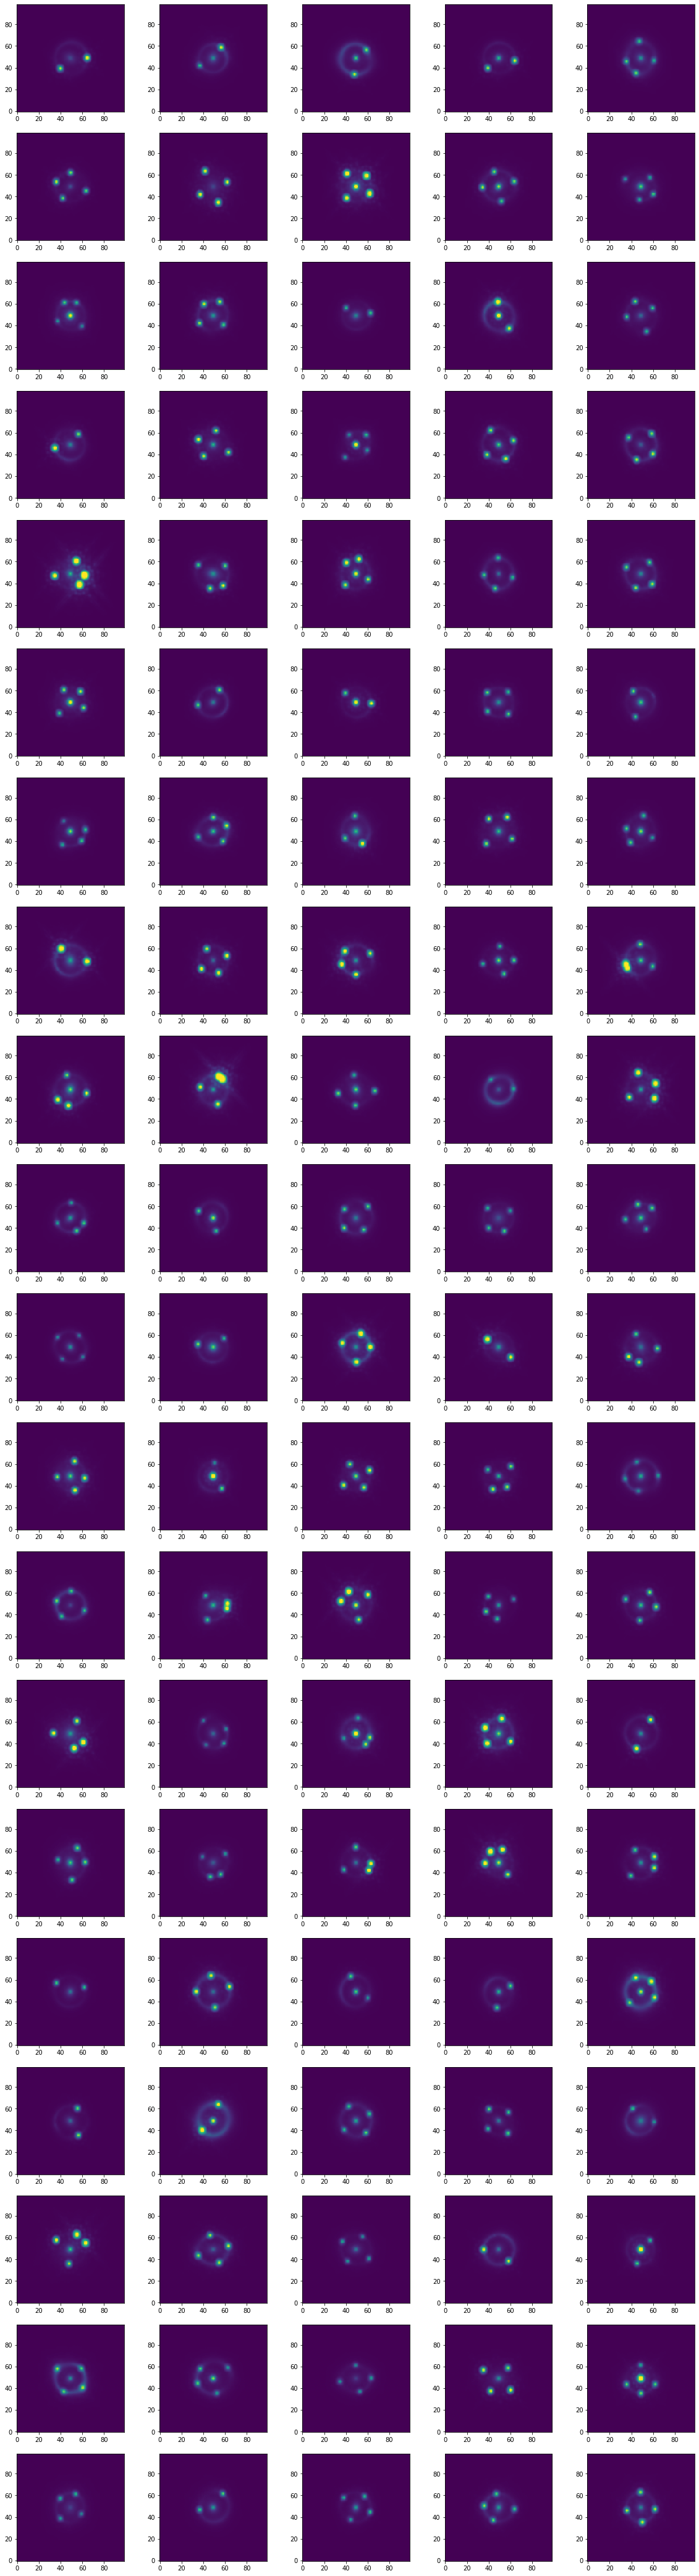

In [13]:
import glob
import matplotlib.image as mpimg

imgs = []
for img_file in img_files[:n_img]:
    img_path = os.path.join(cfg.out_dir, img_file)
    imgs.append(np.load(img_path))

plt.figure(figsize=(20, 80))
n_columns = 5
for i, img in enumerate(imgs):
    plt.subplot(len(imgs)/n_columns+1, n_columns, i+1)
    plt.imshow(img, origin='lower', norm=norm)